In [1]:
import numpy as np

import matplotlib.image as mpimg
from matplotlib import pyplot as plt

In [2]:
file = './/attachments//ha_temp_16_20251107_235233_101031837.png'
# file = './/attachments//ha_temp_16_20251106_235233_924494969.png'

In [ ]:
tick_labels_template = {
    '': np.array([
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1]
    ]),
    '0': np.array([
        [1, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 0, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 1]
    ]),
    '1': np.array([
        [1, 1, 1, 0, 0, 1, 1],
        [1, 1, 0, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 1, 1],
        [1, 1, 1, 0, 0, 1, 1],
        [1, 1, 1, 0, 0, 1, 1],
        [1, 1, 1, 0, 0, 1, 1],
        [1, 1, 1, 0, 0, 1, 1],
        [1, 1, 1, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 0, 0]
    ]),
    '2': np.array([
        [1, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1, 0, 0],
        [1, 1, 1, 1, 0, 0, 1],
        [1, 1, 1, 0, 0, 1, 1],
        [1, 1, 0, 0, 1, 1, 1],
        [1, 0, 0, 1, 1, 1, 1],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]
    ]),
    '4': np.array([
        [1, 1, 1, 1, 0, 0, 1],
        [1, 1, 1, 0, 0, 0, 1],
        [1, 1, 0, 0, 0, 0, 1],
        [1, 0, 0, 1, 0, 0, 1],
        [0, 0, 1, 1, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 0, 1],
        [1, 1, 1, 1, 0, 0, 1],
        [1, 1, 1, 0, 0, 0, 0]
    ]),
    '8': np.array([
        [1, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [0, 0, 1, 1, 1, 0, 0],
        [1, 0, 0, 0, 0, 0, 1]
    ]),
}

residual = lambda x, y: np.sum(np.abs(x - y))

In [4]:
img = mpimg.imread(file)

gray = img[..., :3].mean(axis=2)

line_mask = (gray > 0.6) * 1

tick_labels_pixels = {
    'upper_left' : line_mask[ 56:65 , 30:37], # upper label, left  digit
    'upper_right': line_mask[ 56:65 , 38:45], # upper label, right digit
    'lower_left' : line_mask[256:265, 30:37], # lower label, left  digit
    'lower_right': line_mask[256:265, 38:45], # lower label, right digit
}

tick_labels_pixels['upper_left']

array([[1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1]])

(np.float64(-0.5), np.float64(6.5), np.float64(8.5), np.float64(-0.5))

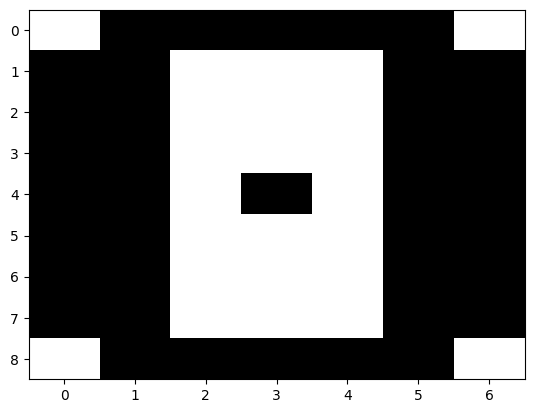

In [5]:
plt.imshow(tick_labels_pixels['lower_right'], cmap='gray')
plt.axis('equal')
plt.axis('tight')

In [6]:
tick_labels_numbers = tick_labels_pixels.copy()
for key in tick_labels_pixels:
    tick_labels_numbers[key] = min(tick_labels_template, key=lambda k: residual(tick_labels_pixels[key], tick_labels_template[k]))

y_max = int(tick_labels_numbers['upper_left'] + tick_labels_numbers['upper_right'])
y_min = int(tick_labels_numbers['lower_left'] + tick_labels_numbers['lower_right'])

[y_min, y_max]

[0, 8]

In [7]:
zero_mask = (line_mask == 0)
line_y = zero_mask.argmax(axis=0).astype(float)
line_y[~zero_mask.any(axis=0)] = np.nan

# convert pixels to values
# y-pixel 267 corresponds to temperature y_min
# y-pixel  66 corresponds to temperature y_max
temp = (line_y[49:-26] - 267) * (y_max - y_min) / (66 - 267) + y_min

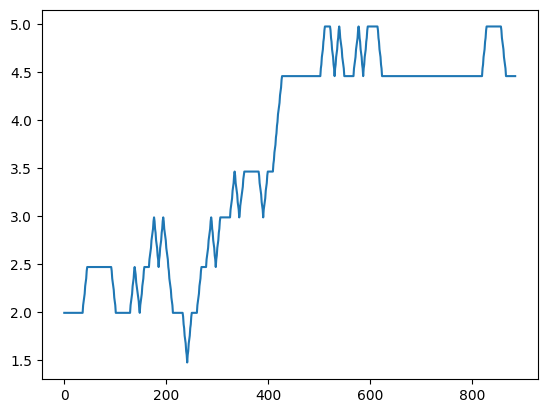

In [8]:
plt.plot(temp)

(np.float64(-0.5), np.float64(959.5), np.float64(299.5), np.float64(-0.5))

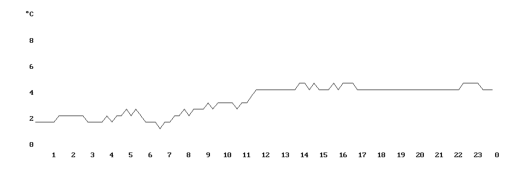

In [9]:
plt.imshow(line_mask, cmap='gray')
plt.axis('off')